In [1]:
import numpy as np
import cv2 # OpenCV-Python
import pandas as pd
from pandas import Series
%matplotlib inline
import matplotlib.pyplot as plt


通常、我々は一定サイズの画像を使う．しかし，同一画像を様々な解像度で処理をする必要がある時もある．画像中で何かを探すとき(例えば顔)や、画像中にどのような大きさで現れるか分からないときがある．そのような状況では、様々な解像度の画像を用意し，そのすべての画像に対して物体検出を試みることを行う．これらの異なる解像度を持つ画像の集合を「画像ピラミッド」(最大解像度の画像を下に，最小解像度の画像を上に積むとピラミッドのようにみえる)と呼ぶ．

画像ピラミッドには 1) ガウシアン・ピラミッドと、 2) ラプラシアン・ピラミッドの2種類がある．

ガウシアン・ピラミッドを構築するには，まず初めに低レベル(高解像度)画像の連続している行と列を削除して高レベル(低解像度)画像を作る．次に高レベル画像中の各画素に周囲5画素の画素値にガウシアンで重み付けした値を設定する．このようにすることで，解像度が M \times N の画像の解像度を M/2 \times N/2 に変更する．この変更によって画像の解像度が1/4に削減される．これをオクターブと呼ぶ．同様の処理をピラミッド中で高レベル方向に向かって(低解像度方向に向かって)続ける．同じように拡張すれば，レベルごとに解像度が4倍になる．ガウシアン・ピラミッドを得るには cv2.pyrDown(src[, dst[, dstsize[, borderType]]]) と cv2.pyrUp(src[, dst[, dstsize[, borderType]]]) 関数を使う． cv2.pyrDown() 関数を使うと画像をボカし、ダウン・サンプルする．

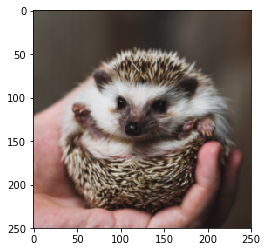

In [3]:
img = cv2.imread('../../img/hari.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.plot(), plt.imshow(lower_reso)
plt.show()

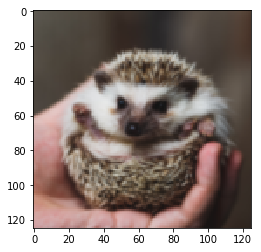

In [5]:
img = cv2.imread('../../img/hari.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
lower_reso = cv2.pyrDown(img)
lower_reso = cv2.pyrDown(lower_reso)
plt.plot(), plt.imshow(lower_reso)
plt.show()

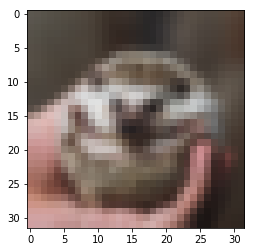

In [6]:
img = cv2.imread('../../img/hari.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
lower_reso = cv2.pyrDown(img)
lower_reso = cv2.pyrDown(lower_reso)
lower_reso = cv2.pyrDown(lower_reso)
lower_reso = cv2.pyrDown(lower_reso)
plt.plot(), plt.imshow(lower_reso)
plt.show()

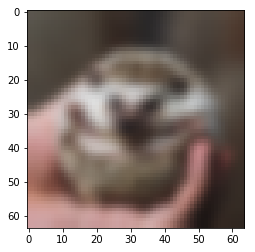

In [11]:
img = cv2.imread('../../img/hari.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
lower_reso = cv2.pyrDown(img)
lower_reso = cv2.pyrDown(lower_reso)
lower_reso = cv2.pyrDown(lower_reso)
lower_reso = cv2.pyrDown(lower_reso)
higher_reso2 = cv2.pyrUp(lower_reso)
plt.plot(), plt.imshow(higher_reso2)

plt.show()

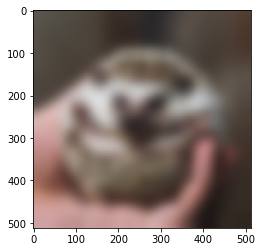

In [10]:
img = cv2.imread('../../img/hari.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
lower_reso = cv2.pyrDown(img)
lower_reso = cv2.pyrDown(lower_reso)
lower_reso = cv2.pyrDown(lower_reso)
lower_reso = cv2.pyrDown(lower_reso)
higher_reso2 = cv2.pyrUp(lower_reso)
higher_reso2 = cv2.pyrUp(higher_reso2)
higher_reso2 = cv2.pyrUp(higher_reso2)
higher_reso2 = cv2.pyrUp(higher_reso2)
plt.plot(), plt.imshow(higher_reso2)

plt.show()

# ピラミッドを使った画像の混合(ブレンディング)

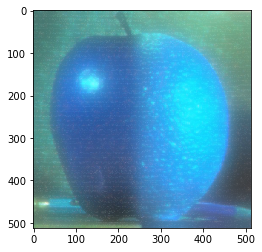

In [21]:
A = cv2.imread('../../img/apple.jpg')
B = cv2.imread('../../img/orange.jpg')

# generate Gaussian pyramid for A
G = A.copy()
gpA = [G]
for i in range(6):
    G = cv2.pyrDown(G)
    gpA.append(G)

# generate Gaussian pyramid for B
G = B.copy()
gpB = [G]
for i in range(6):
    G = cv2.pyrDown(G)
    gpB.append(G)

# generate Laplacian Pyramid for A
lpA = [gpA[5]]
for i in range(5,0,-1):
    GE = cv2.pyrUp(gpA[i])
    L = cv2.subtract(gpA[i-1],GE)
    lpA.append(L)

# generate Laplacian Pyramid for B
lpB = [gpB[5]]
for i in range(5,0,-1):
    GE = cv2.pyrUp(gpB[i])
    L = cv2.subtract(gpB[i-1],GE)
    lpB.append(L)

# Now add left and right halves of images in each level
LS = []
for la,lb in zip(lpA,lpB):
    rows,cols,dpt = la.shape
    ls = np.hstack((la[:,0:cols//2], lb[:,cols//2:]))
    LS.append(ls)

# now reconstruct
ls_ = LS[0]
for i in range(1,6):
    ls_ = cv2.pyrUp(ls_)
    ls_ = cv2.add(ls_, LS[i])

# image with direct connecting each half
real = np.hstack((A[:,:cols//2],B[:,cols//2:]))

plt.plot(), plt.imshow(ls_)
plt.show()


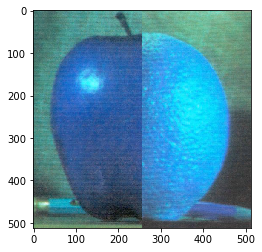

In [19]:
plt.plot(), plt.imshow(real)
plt.show()
